# ЭПР - этап обработки данных.




## Исследование влияния амплитуды высокочастотной модуляции на вид спектров ЭПР.

Максимальная амплитуда модуляции  0.99


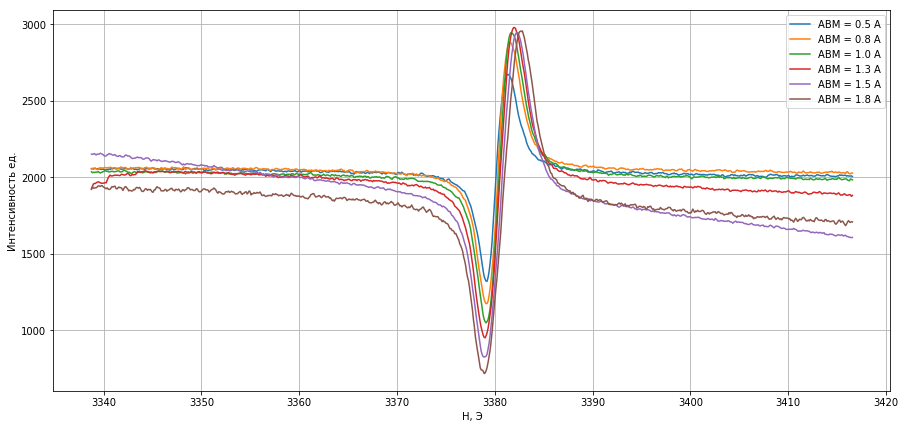

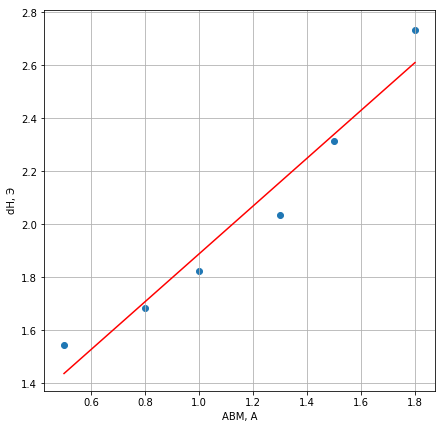

In [11]:
# подключение библиотек
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
from math import* 
import warnings
warnings.filterwarnings('ignore')

# Отображение полученных спектров.

# Парсинг данных.

# АВМ = 0.5 А
DFPG_05A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 0.5 А).epr.txt', sep = '\s+' )
field_05A = DFPG_05A['field,G']
intensity_05A = DFPG_05A['intensity,a.u.']

# АВМ = 0.8 А
DFPG_08A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 0.8 А).epr.txt', sep = '\s+' )
field_08A = DFPG_08A['field,G']
intensity_08A = DFPG_08A['intensity,a.u.']

# АВМ = 1.0 А
DFPG_1A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 1.0 А).epr.txt', sep = '\s+' )
field_1A = DFPG_1A['field,G']
intensity_1A = DFPG_1A['intensity,a.u.']

# АВМ = 1.3 А                        
DFPG_13A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 1.3 А).epr.txt', sep = '\s+' )
field_13A = DFPG_13A['field,G']
intensity_13A = DFPG_13A['intensity,a.u.']

# АВМ = 1.5 А                        
DFPG_15A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 1.5 А).epr.txt', sep = '\s+' )
field_15A = DFPG_15A['field,G']
intensity_15A = DFPG_15A['intensity,a.u.']

# АВМ = 1.8 А                        
DFPG_18A = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание1/ДФПГ(ток модуляции 1.8 А).epr.txt', sep = '\s+' )
field_18A = DFPG_18A['field,G']
intensity_18A = DFPG_18A['intensity,a.u.']

#Визуализация.
plt.figure(figsize= (15,7)) 
plt.plot(field_05A,intensity_05A, label='АВМ = 0.5 А')
plt.plot(field_08A,intensity_08A, label='АВМ = 0.8 А')
plt.plot(field_1A,intensity_1A, label='АВМ = 1.0 А')
plt.plot(field_13A,intensity_13A, label='АВМ = 1.3 А')
plt.plot(field_15A,intensity_15A, label='АВМ = 1.5 А')
plt.plot(field_18A,intensity_18A, label='АВМ = 1.8 А')
plt.xlabel("H, Э")
plt.ylabel("Интенсивность ед.")
plt.grid()
plt.legend();


# Построение зависимости полуширины линий поглощения dH от величины тока модуляции.

def findMaxIndex(mas): # Функция возвращает индекс максимального элемента.
    currentIndex = 0
    currentMax = -inf
    for i in range(len(mas)):
        if(mas[i] > currentMax):
            currentMax = mas[i]
            currentIndex = i
    return currentIndex        
   
def findMinIndex(mas): # Функция возвращает индекс минимального элемента.
    currentIndex = 0
    currentMin = +inf
    for i in range(len(mas)):
        if(mas[i] < currentMin):
            currentMin = mas[i]
            currentIndex = i
    return currentIndex        

"""
При рассчете полуширины линий поглощения воспользуемся средним коэффициентом в предположениях 
о форме кривой поглощения (Лоренц или Гаусс).
"""
k = 1.43

# Функция для нахождения dH_max

def find_dH_max(x, y, show = 0):
    i_min = findMinIndex(y)
    i_max = findMaxIndex(y)
    if(show != 0):
        print("H_min = ", x[i_min],"I_min = " , y[i_min])
        print("H_max = ", x[i_max],"I_max = " , y[i_max])
        print("dH = ",x[i_max]-x[i_min])
    return fabs(x[i_max]-x[i_min])    


dH_05 = find_dH_max(field_05A,intensity_05A)/k
dH_08 = find_dH_max(field_08A,intensity_08A)/k
dH_1 = find_dH_max(field_1A,intensity_1A)/k
dH_13 = find_dH_max(field_13A, intensity_13A)/k
dH_15 = find_dH_max(field_15A, intensity_15A)/k
dH_18 = find_dH_max(field_18A, intensity_18A)/k

dH = [dH_05,dH_08,dH_1,dH_13,dH_15,dH_18] # Данные для МНК
ABM = [0.5,0.8,1,1.3,1.5,1.8]
yErr = [0.2]*6 # Порядок ошибки при определениии dH

def myFunction(x, a, b): # Функция для МНК
     return a*x+b

# Мнк
xlist = mlab.frange (ABM[0], ABM[len(ABM)-1], 0.005)
result = curve_fit(f = myFunction, xdata= ABM, ydata= dH, sigma = yErr, absolute_sigma = True )
popt, pcov = result
    
#Визуализация.
plt.figure(figsize= (7,7)) 
plt.scatter(ABM,dH)
plt.plot(xlist, myFunction(xlist, *popt),color = 'red')
plt.xlabel("ABM, A")
plt.ylabel("dH, Э")
plt.grid()

        
print("Максимальная амплитуда модуляции ", myFunction(0,*popt).round(2))


## Исследование скорости спинового обмена в растворах и кристаллах.

Угол наклона =  28.39 Э/M
Ke = 4.9*10^8 M^-1 c^-1


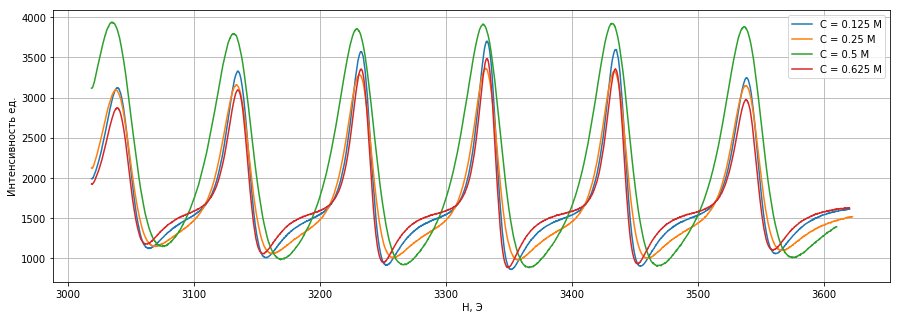

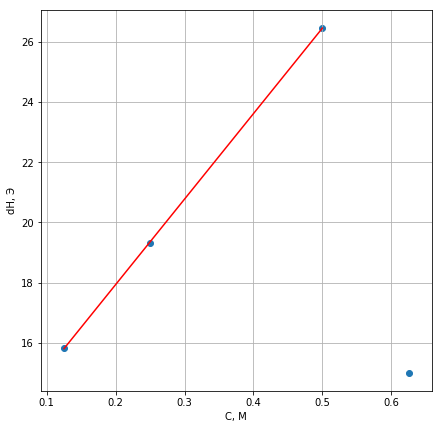

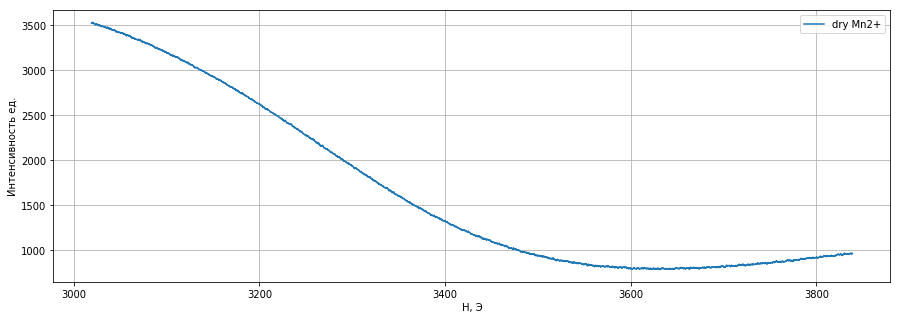

In [36]:
# Парсинг данных.
# Были зарегистрированы спектры ЭПР при разных концентрациях соли Mn(2+)

# Mn(2+) , 0.5 M
MnCl2_05M = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание2/MnCl2(0_5M)усиление10.epr.txt', sep = '\s+' )
field_05M = MnCl2_05M['field,G']
intensity_05M = MnCl2_05M['intensity,a.u.']

# Mn(2+) , 0.25 M
MnCl2_025M = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание2/MnCl2(0_25M)усиление5.epr.txt', sep = '\s+' )
field_025M = MnCl2_025M['field,G']
intensity_025M = MnCl2_025M['intensity,a.u.']

# Mn(2+) , 0.125 M
MnCl2_0125M = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание2/MnCl2(0_125M)усиление5.epr.txt', sep = '\s+' )
field_0125M = MnCl2_0125M['field,G']
intensity_0125M = MnCl2_0125M['intensity,a.u.']

# Mn(2+) , 0.625 M
MnCl2_0625M = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание2/MnCl2(0_0625M)усиление5.epr.txt', sep = '\s+' )
field_0625M = MnCl2_0625M['field,G']
intensity_0625M = MnCl2_0625M['intensity,a.u.']

MnCl2_DRY = pd.read_table('/home/dmitry/LatexProjects/physicalMethods/ЭПР/GadeckyDmitry/Задание2/MnCl2сухой.txt', sep = '\s+' )
field_DRY = MnCl2_DRY['field,G']
intensity_DRY = MnCl2_DRY['intensity,a.u.']


#Визуализация.
plt.figure(figsize= (15,5))
plt.plot(field_0125M,intensity_0125M, label='C = 0.125 M')
plt.plot(field_025M,intensity_025M, label='C = 0.25 M')
plt.plot(field_05M,intensity_05M, label='C = 0.5 M')
plt.plot(field_0625M,intensity_0625M, label='C = 0.625 M')
plt.xlabel("H, Э")
plt.ylabel("Интенсивность ед.")
plt.legend();
plt.grid()


'''
Далее нужно построить график зависимости полуширины линии поглощения dH от концентрации раствора.
С учетом усиления сигнала.
'''

def shear(x, y):
    startIndex = 0
    stopIndex = 0
    for i in range(len(x)):
        if(x[i] > 3500 and startIndex ==0):
            startIndex = i
        if(x[i] > 3600 and stopIndex == 0):
            stopIndex = i    
    resX = np.array(x[startIndex : stopIndex])
    resY = np.array(y[startIndex : stopIndex])
    return [resX, resY]

"""
При рассчете полуширины линий поглощения воспользуемся средним коэффициентом в предположениях 
о форме кривой поглощения (Лоренц или Гаусс).
"""
k = 1.43

tmp1 = shear(field_0125M,intensity_0125M )
tmp2 = shear(field_025M,intensity_025M )
tmp3 = shear(field_05M,intensity_05M )
tmp4 = shear(field_0625M,intensity_0625M )

dH_0125 = find_dH_max(tmp1[0],tmp1[1])/k
dH_025 = find_dH_max(tmp2[0],tmp2[1])/k
dH_05 = find_dH_max(tmp3[0],tmp3[1])/(k)
dH_0625 = find_dH_max(tmp4[0],tmp4[1])/k


dH = [dH_0125,dH_025,dH_05,dH_0625] # Данные для МНК
C = [0.125,0.25,0.5,0.625]
yErr = [0.2]*3 # Порядок ошибки при определениии dH


# Мнк
xlist = mlab.frange (C[0], C[len(C)-2], 0.005)
result = curve_fit(f = myFunction, xdata= C[0:3], ydata= dH[0:3], sigma = yErr[0:3], absolute_sigma = True )
popt, pcov = result
    
#Визуализация.
plt.figure(figsize= (7,7)) 
plt.scatter(C,dH)
plt.plot(xlist, myFunction(xlist, *popt),color = 'red')
plt.xlabel("C, М")
plt.ylabel("dH, Э")
plt.grid()

# Находим угол наклона прямой:
print("Угол наклона = ", popt[0].round(2),"Э/M")

# Делаем оценку константы спинового обмена по формуле dH = K*C/gamma
gamma = 17.6*10**6 #1/(Э*c)

Ke = popt[0]*gamma

print("Ke = 4.9*10^8 M^-1 c^-1")


# Частота двойных соударений парамагнитных частиц находится просто С*Ke

# Сухой Mn2+

plt.figure(figsize= (15,5))
plt.plot(field_DRY,intensity_DRY,label = "dry Mn2+")
plt.xlabel("H, Э")
plt.ylabel("Интенсивность ед.")
plt.legend();
plt.grid()